# 特徴量作成

In [15]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import os 
import glob
import pprint
from sklearn.preprocessing import StandardScaler

In [3]:
# 本人によるアノテーションスコアの算出
def make_label(filename):
    df = pd.read_excel('../../data/Hazumi1911/questionnaire/1911questionnaires.xlsx', sheet_name=4, index_col=0, header=1)
    data = df.loc[filename, :].values.tolist()
    return [data[0]+(8-data[5]), (8-data[1])+data[6], data[2]+(8-data[7]), data[3]+(8-data[8]), data[4]+(8-data[9])]

# 第三者によるアノテーションスコアの算出
def make_label_thirdbigfive(filename):
    df = pd.read_excel('../../data/Hazumi1911/questionnaire/220818thirdbigfive-Hazumi1911.xlsx', sheet_name=5, header=1, index_col=0)
    data = df.loc[filename].values.tolist()
    return [data[5], data[13], data[21], data[29], data[37]]

videoIDs = {}
videoAudio = {}
videoText = {}
videoVisual = {} 
videoSentence = {}

videoPersona = {}
videoSentiment = {}

Vid = []

path = '../../data/Hazumi1911/dumpfiles/*'

files = glob.glob(path)

for file_path in sorted(files):
    filename = os.path.basename(file_path).split('.', 1)[0]
    df = pd.read_csv(file_path)
    text = df.loc[:, 'word#0001':'su'].values.tolist()
    audio = df.loc[:, 'pcm_RMSenergy_sma_max':'F0_sma_de_kurtosis'].values.tolist()
    visual = df.loc[:, '17_acceleration_max':'AU45_c_mean'].values.tolist()
    label = df.loc[:, 'TS_ternary'].values.tolist()
    
    Vid.append(filename)
    videoAudio[filename] = audio 
    videoText[filename] = text 
    videoVisual[filename] = visual 
    videoIDs[filename] = []
    videoSentence[filename] = []

    videoPersona[filename] = make_label_thirdbigfive(filename)
    videoSentiment[filename] = label

# ファイル書き込み
with open('../../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='wb') as f:
    pickle.dump((videoIDs, videoSentiment, videoPersona, videoText, videoAudio, videoVisual, videoSentence, Vid), f)

# ファイル読み込み
with open('../../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='rb') as f:
    videoIDs, videoSentiment, videoPersona, videoText, videoAudio,\
    videoVisual, videoSentence, Vid = pickle.load(f, encoding='utf-8')

# 特徴量集計

In [19]:
# 特徴量の分布を集計
text = []
for filename, data in videoText.items():
    data = np.array(data)
    text.extend(data)

df = pd.DataFrame(text)
print('----text----')
print(df.describe())

audio = []
for filename, data in videoAudio.items():
    data = np.array(data)
    audio.extend(data)

df = pd.DataFrame(audio)
print('----audio----')
print(df.describe())

visual = []
for filename, data in videoVisual.items():
    data = np.array(data)
    visual.extend(data)

print('----visual----')
df = pd.DataFrame(visual)
print(df.describe())

----text----
              0            1            2            3            4     \
count  2439.000000  2439.000000  2439.000000  2439.000000  2439.000000   
mean      0.060271     0.305043     0.000410     0.158672     0.018450   
std       0.259472     0.488190     0.020249     0.510591     0.137614   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       3.000000     3.000000     1.000000     7.000000     2.000000   

              5            6            7            8            9     ...  \
count  2439.000000  2439.000000  2439.000000  2439.000000  2439.000000  ...   
mean      0.191062     0.004510     0.010250     0.008610     0.006150  ...   
std       0.512744     0.088164     0.100743     0.096746     0.083277  ...   
min 

# その他

# 特性ごとに予測した結果

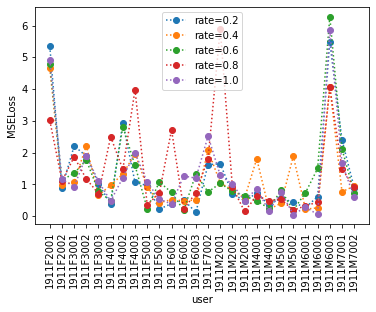

pretrained2    : 34.114
pretrained4    : 31.743700000000004
pretrained6    : 34.5377
pretrained8    : 38.3474
pretrained10    : 33.6522
pretrained2    : 1.312076923076923
pretrained4    : 1.2209115384615385
pretrained6    : 1.328373076923077
pretrained8    : 1.4749
pretrained10    : 1.2943153846153845


In [97]:
pred_pretrained2 = [5.3417, 0.896, 2.2062, 1.8886, 1.0172, 0.3803, 2.9352, 1.0634, 0.9599, 0.2178, 0.3941, 0.5067, 0.1207, 1.6199, 1.6453, 0.7101, 0.4758, 0.7226, 0.3576, 0.5725, 0.4287, 0.2698, 0.61, 5.479, 2.3974, 0.8975]
pred_pretrained4 = [4.6502, 0.9927, 1.0664, 2.2147, 0.6555, 0.9705, 1.3237, 1.9657, 0.9183, 0.4195, 0.5191, 0.4794, 0.5057, 2.0659, 1.0452, 0.8219, 0.5642, 1.804, 0.2134, 0.4053, 1.8845, 0.2167, 0.259, 4.0724, 0.7681, 0.9417]
pred_pretrained6 = [4.7872, 1.1298, 1.3506, 1.7619, 0.7744, 0.4848, 2.8171, 1.5926, 0.2361, 1.0741, 0.7438, 0.1837, 1.3257, 0.7574, 1.0338, 0.7749, 0.6454, 0.4733, 0.2476, 0.8069, 0.1849, 0.7335, 1.4989, 6.2724, 2.113, 0.7339]
pred_pretrained8 = [3.0103, 1.1042, 1.8608, 1.1688, 0.7072, 2.4966, 1.4692, 3.9767, 0.3534, 0.7245, 2.7156, 0.2205, 0.7323, 1.8118, 5.892, 0.9076, 0.1451, 0.6446, 0.4814, 0.531, 0.1809, 0.3247, 0.4373, 4.0556, 1.4912, 0.9041]
pred_pretrained10 = [4.9137, 1.1569, 0.9292, 1.9042, 1.0906, 0.4725, 1.21, 1.9955, 1.0637, 0.5373, 0.3778, 1.264, 1.1916, 2.517, 1.2845, 1.0029, 0.4794, 0.8672, 0.1573, 0.7565, 0.048, 0.2792, 0.0494, 5.8504, 1.6654, 0.588]


plt.plot(Vid, pred_pretrained2, 'o', linestyle='dotted', label='rate=0.2')
plt.plot(Vid, pred_pretrained4, 'o', linestyle='dotted', label='rate=0.4')
plt.plot(Vid, pred_pretrained6, 'o', linestyle='dotted', label='rate=0.6')
plt.plot(Vid, pred_pretrained8, 'o', linestyle='dotted', label='rate=0.8')
plt.plot(Vid, pred_pretrained10, 'o', linestyle='dotted', label='rate=1.0')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'pretrained2    : {np.array(pred_pretrained2).sum()}')
print(f'pretrained4    : {np.array(pred_pretrained4).sum()}')
print(f'pretrained6    : {np.array(pred_pretrained6).sum()}')
print(f'pretrained8    : {np.array(pred_pretrained8).sum()}')
print(f'pretrained10    : {np.array(pred_pretrained10).sum()}')
print(f'pretrained2    : {np.array(pred_pretrained2).mean()}')
print(f'pretrained4    : {np.array(pred_pretrained4).mean()}')
print(f'pretrained6    : {np.array(pred_pretrained6).mean()}')
print(f'pretrained8    : {np.array(pred_pretrained8).mean()}')
print(f'pretrained10    : {np.array(pred_pretrained10).mean()}')

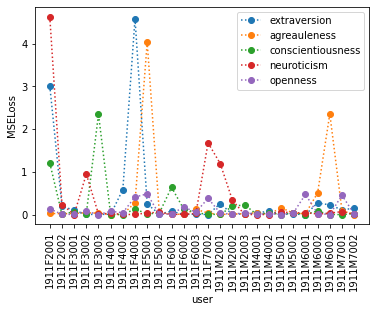

extraversion : 9.998499999999998
agreauleness   : 7.912300000000002
conscientiousness : 5.2585
neuroticism  : 9.4565
openness : 2.9617999999999998


In [41]:
pred_extraversion = [3.0123, 0.202, 0.0963, 0.0011, 0.005, 0.0039, 0.5851, 4.5864, 0.246, 0.0114, 0.0762, 0.0014, 0.0076, 0.0002, 0.2573, 0.0043, 0.0163, 0.0306, 0.0854, 0.0041, 0.0101, 0.0, 0.272, 0.2262, 0.1091, 0.1482]
pred_agreauleness = [0.0267, 0.0184, 0.0259, 0.0424, 0.0311, 0.0002, 0.0046, 0.2791, 4.0358, 0.0274, 0.014, 0.0028, 0.1235, 0.0332, 0.0031, 0.01, 0.0209, 0.0451, 0.0031, 0.1599, 0.0326, 0.02, 0.5059, 2.3555, 0.0909, 0.0002]
pred_conscientiousness = [1.2061, 0.0032, 0.066, 0.0237, 2.3536, 0.0, 0.0005, 0.1292, 0.0142, 0.0379, 0.6372, 0.1299, 0.0435, 0.0028, 0.0064, 0.1892, 0.2288, 0.003, 0.0411, 0.0002, 0.04, 0.0004, 0.0813, 0.0007, 0.0, 0.0196]
pred_neuroticism = [4.6297, 0.2344, 0.0001, 0.9469, 0.0109, 0.0294, 0.0014, 0.0021, 0.038, 0.0528, 0.0041, 0.003, 0.0278, 1.6787, 1.1927, 0.3363, 0.0012, 0.0002, 0.0008, 0.0651, 0.036, 0.0462, 0.0108, 0.0308, 0.0699, 0.0072]
pred_openness = [0.1335, 0.0053, 0.0035, 0.0758, 0.0, 0.0754, 0.0431, 0.4124, 0.4828, 0.0014, 0.0139, 0.1751, 0.0555, 0.3798, 0.0353, 0.0051, 0.0415, 0.0047, 0.0224, 0.0008, 0.0362, 0.4722, 0.0226, 0.0, 0.4522, 0.0113]

plt.plot(Vid, pred_extraversion, 'o', linestyle='dotted', label='extraversion')
plt.plot(Vid, pred_agreauleness, 'o', linestyle='dotted', label='agreauleness')
plt.plot(Vid, pred_conscientiousness, 'o', linestyle='dotted', label='conscientiousness')
plt.plot(Vid, pred_neuroticism, 'o', linestyle='dotted', label='neuroticism')
plt.plot(Vid, pred_openness, 'o', linestyle='dotted', label='openness')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'extraversion : {np.array(pred_extraversion).sum()}')
print(f'agreauleness   : {np.array(pred_agreauleness).sum()}')
print(f'conscientiousness : {np.array(pred_conscientiousness).sum()}')
print(f'neuroticism  : {np.array(pred_neuroticism).sum()}')
print(f'openness : {np.array(pred_openness).sum()}')

# 特性を個別に予測した結果と同時に予測した結果の比較

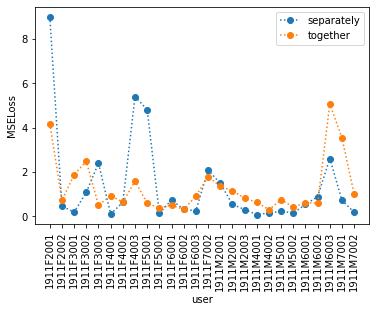

separately : 35.5876
together   : 33.7612


In [40]:
pred_separately = []
for i in range(len(Vid)):
    pred_separately.append(pred_extraversion[i] + pred_agreauleness[i] + pred_conscientiousness[i] + \
                           pred_neuroticism[i] + pred_openness[i])

pred_together = [4.1911, 0.7212, 1.8888, 2.487, 0.5033, 0.9333, 0.6441, 1.5912, 0.5993, 0.374, 0.5071, 0.3131, 0.913, 1.792, 1.3657, 1.1517, 0.8243, 0.6397, 0.3012, 0.7551, 0.4262, 0.6153, 0.5966, 5.0875, 3.5341, 1.0053]

plt.plot(Vid, pred_separately, 'o', linestyle='dotted', label='separately')
plt.plot(Vid, pred_together, 'o', linestyle='dotted', label='together')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'separately : {np.array(pred_separately).sum()}')
print(f'together   : {np.array(pred_together).sum()}')

# 各モーダルと予測結果の比較
ラベルはBig Fiveを同時に予測

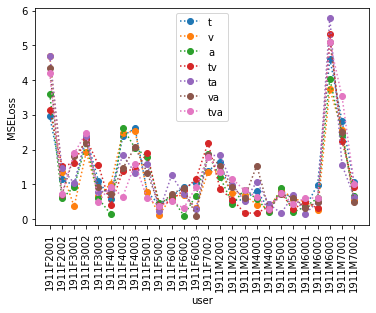

text : 34.3401
visual  : 31.534
audio : 30.649299999999997
text+visual  : 32.7544
text+audio : 34.5848
visual+audio  : 34.6131
all : 33.7612


In [37]:
pred_t = [2.9582, 1.1416, 0.9667, 2.3355, 1.094, 0.5861, 2.3942, 2.6084, 0.7773, 0.4119, 0.6424, 0.9191, 1.0483, 1.3837, 1.6524, 0.532, 0.5578, 0.8147, 0.2861, 0.8128, 0.5819, 0.3354, 0.9894, 4.6176, 2.8303, 1.0623]
pred_v = [4.6852, 1.362, 0.364, 1.9336, 0.6702, 1.0122, 2.4643, 2.5422, 0.7756, 0.1256, 0.641, 0.691, 0.3192, 1.3627, 1.3508, 0.7595, 0.6973, 0.412, 0.3142, 0.8523, 0.5828, 0.4987, 0.2716, 3.7352, 2.5583, 0.5525]
pred_a = [3.596, 0.5937, 0.9218, 2.198, 0.5917, 0.1391, 2.6212, 2.0446, 1.7949, 0.4576, 0.6258, 0.1006, 0.6671, 1.8597, 1.1993, 0.4302, 0.8438, 0.5739, 0.207, 0.8863, 0.1955, 0.3596, 0.5968, 4.0421, 2.4322, 0.6708]
pred_tv = [3.1356, 1.5232, 1.6106, 2.3108, 1.5463, 0.3979, 1.3764, 1.4317, 1.8892, 0.3808, 0.5415, 0.8293, 1.1429, 2.1923, 0.8553, 0.5616, 0.1738, 0.1694, 0.3559, 0.7434, 0.2845, 0.5023, 0.3079, 5.3219, 2.2377, 0.9322]
pred_ta = [4.6922, 1.4546, 1.0315, 2.3955, 0.7666, 0.8382, 1.8405, 1.3282, 1.5857, 0.2364, 1.2529, 0.726, 0.2866, 1.8297, 1.8293, 0.9776, 0.5209, 1.0674, 0.4394, 0.1623, 0.6873, 0.1575, 0.4925, 5.7906, 1.5623, 0.6331]
pred_va = [4.3439, 0.701, 1.8244, 2.2025, 0.9263, 0.7152, 1.4587, 2.0719, 1.3323, 0.3758, 0.725, 0.8852, 0.1, 1.856, 1.5329, 0.9092, 0.613, 1.5404, 0.2548, 0.7214, 0.6136, 0.3247, 0.479, 5.1042, 2.5148, 0.4869]
pred_tva = [4.1911, 0.7212, 1.8888, 2.487, 0.5033, 0.9333, 0.6441, 1.5912, 0.5993, 0.374, 0.5071, 0.3131, 0.913, 1.792, 1.3657, 1.1517, 0.8243, 0.6397, 0.3012, 0.7551, 0.4262, 0.6153, 0.5966, 5.0875, 3.5341, 1.0053]

plt.plot(Vid, pred_t, 'o', linestyle='dotted', label='t')
plt.plot(Vid, pred_v, 'o', linestyle='dotted', label='v')
plt.plot(Vid, pred_a, 'o', linestyle='dotted', label='a')
plt.plot(Vid, pred_tv, 'o', linestyle='dotted', label='tv')
plt.plot(Vid, pred_ta, 'o', linestyle='dotted', label='ta')
plt.plot(Vid, pred_va, 'o', linestyle='dotted', label='va')
plt.plot(Vid, pred_tva, 'o', linestyle='dotted', label='tva')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'text : {np.array(pred_t).sum()}')
print(f'visual  : {np.array(pred_v).sum()}')
print(f'audio : {np.array(pred_a).sum()}')
print(f'text+visual  : {np.array(pred_tv).sum()}')
print(f'text+audio : {np.array(pred_ta).sum()}')
print(f'visual+audio  : {np.array(pred_va).sum()}')
print(f'all : {np.array(pred_tva).sum()}')

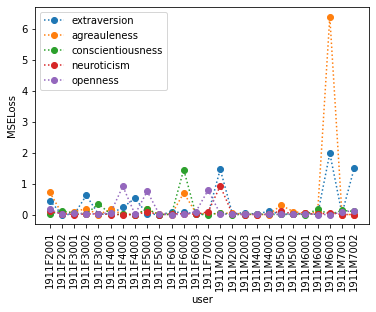

extraversion : 7.287699999999999
agreauleness   : 9.1234
conscientiousness : 2.6734999999999998
neuroticism  : 1.5772
openness : 3.1626000000000003


In [8]:
pred_extraversion = [0.4516, 0.0, 0.0054, 0.6191, 0.0062, 0.0253, 0.2306, 0.5226, 0.0187, 0.0001, 0.0707, 0.0726, 0.0253, 0.0054, 1.4589, 0.023, 0.0643, 0.0056, 0.1163, 0.0016, 0.0331, 0.0336, 0.0033, 1.9759, 0.0271, 1.4914]
pred_agreauleness = [0.7177, 0.0284, 0.0955, 0.1881, 0.0, 0.1704, 0.0112, 0.0004, 0.1638, 0.0037, 0.0008, 0.6981, 0.0563, 0.0036, 0.042, 0.0443, 0.0115, 0.0002, 0.0008, 0.3021, 0.0951, 0.0411, 0.0717, 6.3758, 0.0006, 0.0002]
pred_conscientiousness = [0.0129, 0.118, 0.0457, 0.0241, 0.3417, 0.0127, 0.002, 0.0, 0.169, 0.0011, 0.0064, 1.4504, 0.0022, 0.0009, 0.0503, 0.0004, 0.0012, 0.0125, 0.0038, 0.0026, 0.0057, 0.0009, 0.168, 0.0078, 0.1319, 0.1013]
pred_neuroticism = [0.1046, 0.0273, 0.0004, 0.0142, 0.0292, 0.0006, 0.0, 0.0001, 0.0848, 0.0, 0.0186, 0.0312, 0.0128, 0.0859, 0.9209, 0.0166, 0.0, 0.0002, 0.0021, 0.1237, 0.0038, 0.0348, 0.0062, 0.0588, 0.0004, 0.0]
pred_openness = [0.1677, 0.0034, 0.039, 0.0261, 0.0134, 0.0625, 0.9102, 0.006, 0.751, 0.0037, 0.0008, 0.0047, 0.0928, 0.7842, 0.0248, 0.0016, 0.0068, 0.0102, 0.0061, 0.0036, 0.0103, 0.0286, 0.0, 0.0001, 0.0774, 0.1276]

plt.plot(Vid, pred_extraversion, 'o', linestyle='dotted', label='extraversion')
plt.plot(Vid, pred_agreauleness, 'o', linestyle='dotted', label='agreauleness')
plt.plot(Vid, pred_conscientiousness, 'o', linestyle='dotted', label='conscientiousness')
plt.plot(Vid, pred_neuroticism, 'o', linestyle='dotted', label='neuroticism')
plt.plot(Vid, pred_openness, 'o', linestyle='dotted', label='openness')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'extraversion : {np.array(pred_extraversion).sum()}')
print(f'agreauleness   : {np.array(pred_agreauleness).sum()}')
print(f'conscientiousness : {np.array(pred_conscientiousness).sum()}')
print(f'neuroticism  : {np.array(pred_neuroticism).sum()}')
print(f'openness : {np.array(pred_openness).sum()}')

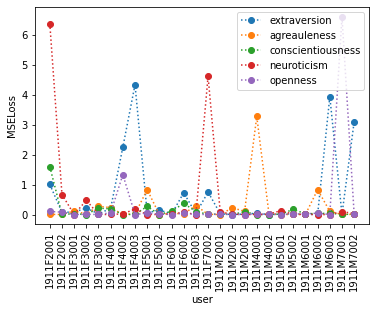

extraversion : 17.110999999999997
agreauleness   : 6.4879999999999995
conscientiousness : 3.3297
neuroticism  : 12.847800000000001
openness : 8.450999999999999


In [9]:
pred_extraversion = [1.0086, 0.0751, 0.0816, 0.2179, 0.0223, 0.2081, 2.2524, 4.3426, 0.05, 0.1605, 0.0098, 0.7292, 0.0309, 0.7536, 0.025, 0.0001, 0.013, 0.045, 0.0, 0.0143, 0.0125, 0.007, 0.002, 3.9393, 0.0066, 3.1036]
pred_agreauleness = [0.0056, 0.0016, 0.1194, 0.0169, 0.2777, 0.2311, 0.0048, 0.0211, 0.8325, 0.0002, 0.0394, 0.0272, 0.3009, 0.0069, 0.0006, 0.2279, 0.1046, 3.2791, 0.0337, 0.0002, 0.0042, 0.0038, 0.834, 0.1049, 0.0027, 0.007]
pred_conscientiousness = [1.6033, 0.0016, 0.0288, 0.0, 0.2155, 0.1884, 0.0008, 0.0061, 0.2736, 0.0013, 0.112, 0.3726, 0.1013, 0.0062, 0.0162, 0.0029, 0.0933, 0.0001, 0.0001, 0.014, 0.1752, 0.0233, 0.0372, 0.0391, 0.0088, 0.008]
pred_neuroticism = [6.3877, 0.6702, 0.0003, 0.4768, 0.0032, 0.0014, 0.0242, 0.1808, 0.0007, 0.0017, 0.0199, 0.0752, 0.0001, 4.6239, 0.0809, 0.0147, 0.0001, 0.0014, 0.0114, 0.1344, 0.0027, 0.0057, 0.0002, 0.0002, 0.1012, 0.0288]
pred_openness = [0.1029, 0.0803, 0.0001, 0.0063, 0.0021, 0.0567, 1.3352, 0.0, 0.0498, 0.0165, 0.0005, 0.0448, 0.0026, 0.0049, 0.0096, 0.0008, 0.0011, 0.0148, 0.0074, 0.0008, 0.0203, 0.0213, 0.0465, 0.0002, 6.6108, 0.0147]

plt.plot(Vid, pred_extraversion, 'o', linestyle='dotted', label='extraversion')
plt.plot(Vid, pred_agreauleness, 'o', linestyle='dotted', label='agreauleness')
plt.plot(Vid, pred_conscientiousness, 'o', linestyle='dotted', label='conscientiousness')
plt.plot(Vid, pred_neuroticism, 'o', linestyle='dotted', label='neuroticism')
plt.plot(Vid, pred_openness, 'o', linestyle='dotted', label='openness')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'extraversion : {np.array(pred_extraversion).sum()}')
print(f'agreauleness   : {np.array(pred_agreauleness).sum()}')
print(f'conscientiousness : {np.array(pred_conscientiousness).sum()}')
print(f'neuroticism  : {np.array(pred_neuroticism).sum()}')
print(f'openness : {np.array(pred_openness).sum()}')

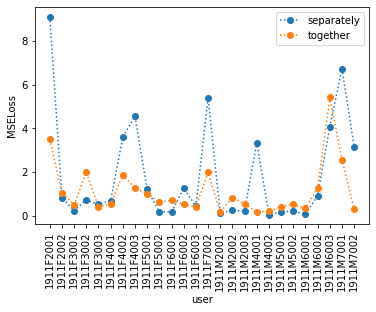

separately : 48.2275
together   : 29.048999999999996


In [10]:
pred_separately = []
for i in range(len(Vid)):
    pred_separately.append(pred_extraversion[i] + pred_agreauleness[i] + pred_conscientiousness[i] + \
                           pred_neuroticism[i] + pred_openness[i])

pred_together = [3.4967, 1.0596, 0.4948, 1.9834, 0.3984, 0.539, 1.8669, 1.2572, 1.0135, 0.6237, 0.701, 0.5195, 0.3992, 1.987, 0.1698, 0.8248, 0.5448, 0.1779, 0.1962, 0.412, 0.5137, 0.3457, 1.2632, 5.4157, 2.5449, 0.3004]

plt.plot(Vid, pred_separately, 'o', linestyle='dotted', label='separately')
plt.plot(Vid, pred_together, 'o', linestyle='dotted', label='together')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

print(f'separately : {np.array(pred_separately).sum()}')
print(f'together   : {np.array(pred_together).sum()}')

In [7]:
import torch
input = torch.randn(3, 5, requires_grad=True)
input

/home/ryoyanagimoto/anaconda3/envs/cross-corpus/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[-0.2407,  0.9745, -0.7526, -0.3181, -0.1239],
        [ 0.0209, -0.3733,  0.7871,  0.2327, -0.0254],
        [-1.8601, -1.0352, -0.0264, -0.0746, -1.6164]], requires_grad=True)

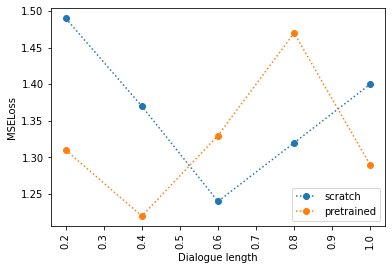

In [3]:
scratch = [1.49, 1.37, 1.24, 1.32, 1.40]
pretrained = [1.31, 1.22, 1.33, 1.47, 1.29]
x = [0.2, 0.4, 0.6, 0.8, 1.0]



plt.plot(x, scratch, 'o', linestyle='dotted', label='scratch')
plt.plot(x, pretrained ,'o', linestyle='dotted', label='pretrained')
plt.xticks(rotation=90)
plt.xlabel('Dialogue length')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

                sentiment loss  persona loss
sentiment loss        1.000000      0.424817
persona loss          0.424817      1.000000


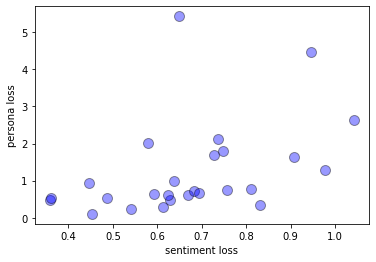

In [2]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115, 0.9776, 0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona = [5.4315, 1.6957, 1.8024, 2.0276, 0.6132, 0.7851, 1.2853, 0.7096, 0.9868, 0.3446, 0.9452, 0.4792, 0.231, 2.1109, 1.6423, 0.6222, 0.5419, 0.6625, 0.2835, 0.741, 0.4666, 0.5428, 0.103, 4.4802, 2.6397, 0.6525]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona loss")        # Y軸ラベル
plt.show()

                sentiment loss  persona loss
sentiment loss        1.000000      0.400258
persona loss          0.400258      1.000000


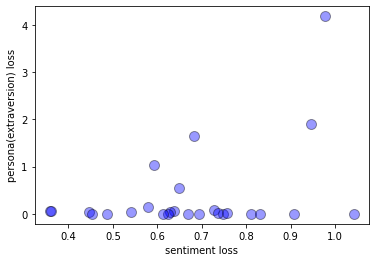

In [3]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115, 0.9776, 0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona= [0.5469, 0.0892, 0.0044, 0.1414, 0.0013, 0.001, 4.1802, 1.6397, 0.0668, 0.0016, 0.0411, 0.0443, 0.0315, 0.0235, 0.0045, 0.0005, 0.0002, 0.0006, 0.0008, 0.0093, 0.0612, 0.0529, 0.0088, 1.9098, 0.0002, 1.0368]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona(extraversion) loss")        # Y軸ラベル
plt.show()


                sentiment loss  persona loss
sentiment loss        1.000000     -0.211387
persona loss         -0.211387      1.000000


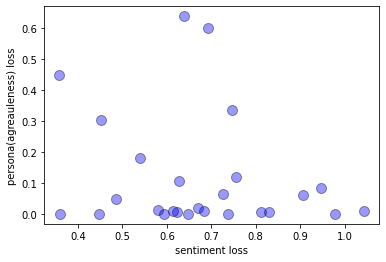

In [4]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115, 0.9776, 0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona= [0.0, 0.0644, 0.3369, 0.0131, 0.0203, 0.0062, 0.0, 0.008, 0.6391, 0.0062, 0.0004, 0.1067, 0.1812, 0.0005, 0.0609, 0.0071, 0.0473, 0.6005, 0.0084, 0.1198, 0.4494, 0.0001, 0.305, 0.0826, 0.0092, 0.0003]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona(agreauleness) loss")        # Y軸ラベル
plt.show()


                sentiment loss  persona loss
sentiment loss         1.00000      -0.26879
persona loss          -0.26879       1.00000


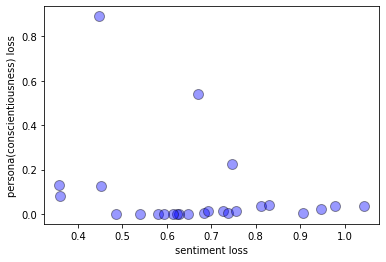

In [11]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115, 0.9776, 0.6826, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona= [0.0009, 0.0124, 0.2241, 0.0001, 0.542, 0.0342, 0.0369, 0.0036, 0.0418, 0.8904, 0.0017, 0.0, 0.0057, 0.003, 0.0009, 0.0, 0.0113, 0.0004, 0.0117, 0.1295, 0.0823, 0.1239, 0.0222, 0.0377, 0.0002]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona(conscientiousness) loss")        # Y軸ラベル
plt.show()


                sentiment loss  persona loss
sentiment loss        1.000000      0.571056
persona loss          0.571056      1.000000


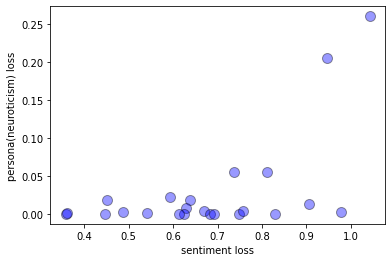

In [10]:
sentiment = [ 0.7478, 0.6693, 0.8115, 0.9776, 0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona= [ 0.0004,  0.0036, 0.0556, 0.0019, 0.0003, 0.0181, 0.0001, 0.0004, 0.0075, 0.0008, 0.0552, 0.0136, 0.0005, 0.0021, 0.0, 0.0, 0.0033, 0.0001, 0.0011, 0.0178, 0.2059, 0.2604, 0.0222]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona(neuroticism) loss")        # Y軸ラベル
plt.show()


                sentiment loss  persona loss
sentiment loss        1.000000      0.044436
persona loss          0.044436      1.000000


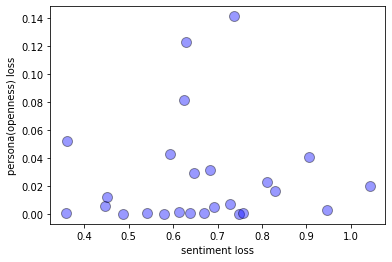

In [8]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115,  0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
persona= [0.0291, 0.0072, 0.0001, 0.0, 0.0003, 0.0232,  0.0313, 0.0006, 0.0163, 0.0054, 0.1229, 0.001, 0.1415, 0.0406, 0.0816, 0.0, 0.0052, 0.0011, 0.0004, 0.0004, 0.052, 0.0122, 0.0028, 0.0201, 0.0428]
df = pd.DataFrame({"sentiment loss":sentiment,
                   "persona loss":persona})

print(df.corr())

# グラフ可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語設定
# rcParams["font.family"]     = "sans-serif"
# rcParams["font.sans-serif"] = "Hiragino Maru Gothic Pro"


# グラフ可視化
plt.scatter(
            df["sentiment loss"],          # X軸値
            df["persona loss"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("sentiment loss")               # X軸ラベル
plt.ylabel("persona(openness) loss")        # Y軸ラベル
plt.show()


In [30]:
sentiment = [0.6477, 0.7275, 0.7478, 0.5792, 0.6693, 0.8115, 0.9776, 0.6826, 0.638, 0.83, 0.4468, 0.6281, 0.5406, 0.737, 0.9066, 0.6239, 0.4865, 0.6929, 0.6131, 0.7564, 0.358, 0.3603, 0.4521, 0.9469, 1.043, 0.5929]
extraversion = []
agreauleness = []
conscientiousness = []
neuroticism = []
openness = []

for id, label in videoLabels.items():
    extraversion.append(label[0])
    agreauleness.append(label[1])
    conscientiousness.append(label[2])
    neuroticism.append(label[3])
    openness.append(label[4])


df = pd.DataFrame({"sentiment loss":sentiment,
                   "extraversion loss":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})



print(df.corr())

                   sentiment loss  extraversion loss  agreauleness  \
sentiment loss           1.000000          -0.091035     -0.424861   
extraversion loss       -0.091035           1.000000      0.001318   
agreauleness            -0.424861           0.001318      1.000000   
conscientiousness       -0.295350          -0.069909      0.438614   
neuroticism              0.291783          -0.146399     -0.327133   
openness                -0.412890           0.575051      0.211240   

                   conscientiousness  neuroticism  openness  
sentiment loss             -0.295350     0.291783 -0.412890  
extraversion loss          -0.069909    -0.146399  0.575051  
agreauleness                0.438614    -0.327133  0.211240  
conscientiousness           1.000000    -0.719623  0.284352  
neuroticism                -0.719623     1.000000 -0.411879  
openness                    0.284352    -0.411879  1.000000  


In [32]:
# 双方向
output = [0.1213, 0.0028, 0.0832, 0.7859, 0.0355, 0.0563, 0.5498, 0.0362, 0.0775, 0.0057, 0.0133, 0.8011, 0.0003, 0.0921, 0.0989, 0.0646, 0.0206, 0.0092, 0.0227, 0.0037, 0.0114, 0.3204, 0.2341, 6.8325, 0.0023, 0.0599]
output = np.array(output)
output.sum()

10.3413

In [33]:
# pretrained 双方向
output = [5.0358, 0.0017, 0.0, 1.0713, 0.0413, 0.0126, 0.5708, 0.4056, 0.0749, 0.0, 0.0002, 0.0014, 0.4121, 0.7111, 0.012, 0.259, 0.3043, 0.3623, 1.2952, 0.0391, 0.0612, 2.284, 0.0948, 6.1085, 0.156, 0.0179]
output = np.array(output)
output.sum()

19.333099999999998

In [ ]:
# 単方向
output = 
output = np.array(output)
output.sum()